In [66]:
import pandas as pd
import os
import shutil
import numpy as np


In [30]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Load CSV file
csv_path = '../output/training_data/train.csv'
df = pd.read_csv(csv_path)

In [4]:
# Specify the source and destination folders
source_folder = '../output/tiles/'
destination_base_folder = '../output/categories/'

In [44]:
for index, row in df.iterrows():
    image_name = row['name']
    category = row['density_category']
    len_of_boundary = row['len_of_boundry_inv']

    if len_of_boundary == 0:
        continue 

    # Create destination folder if it doesn't exist
    destination_folder = os.path.join(destination_base_folder, str(category))
    os.makedirs(destination_folder, exist_ok=True)

    # Form paths for source and destination
    source_path = os.path.join(source_folder, image_name)
    destination_path = os.path.join(destination_folder, image_name)

    # Move the image
    shutil.copy(source_path, destination_path)

print("Images moved successfully.")

Images moved successfully.


In [19]:
df[df['len_of_boundry_inv'] == 0].head()

,name,len_of_boundry,len_of_boundry_inv,disjoint_image,tile_size,num_triangles,image_category,triangle_per_100px,density_category,neighbours,len_of_boundry_per_100px
0,branch_line_coupler_0_250_0_0.png,996.0,0.0,0,250,7,0,1.12,0,0,0.0
1,branch_line_coupler_0_250_0_1.png,996.0,0.0,0,250,58,0,9.28,0,2,0.0
3,branch_line_coupler_0_250_0_3.png,996.0,0.0,0,250,51,0,8.16,0,4,0.0
4,branch_line_coupler_0_250_0_4.png,996.0,0.0,0,250,14,0,2.24,0,4,0.0
7,branch_line_coupler_0_250_0_7.png,996.0,0.0,0,250,13,0,2.08,0,2,0.0


In [21]:
df

,name,len_of_boundry,len_of_boundry_inv,disjoint_image,tile_size,num_triangles,image_category,triangle_per_100px,density_category,neighbours,len_of_boundry_per_100px
0,branch_line_coupler_0_250_0_0.png,996.000000,0.000000,0,250,7,0,1.12,0,0,0.000000
1,branch_line_coupler_0_250_0_1.png,996.000000,0.000000,0,250,58,0,9.28,0,2,0.000000
2,branch_line_coupler_0_250_0_2.png,1050.000000,938.000000,1,250,235,2,37.60,1,2,375.200000
3,branch_line_coupler_0_250_0_3.png,996.000000,0.000000,0,250,51,0,8.16,0,4,0.000000
4,branch_line_coupler_0_250_0_4.png,996.000000,0.000000,0,250,14,0,2.24,0,4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6269,planar_filter_95_500_1_2.png,3008.896536,1205.663994,3,500,716,2,28.64,1,5,241.132799
6270,planar_filter_95_500_1_3.png,2822.062013,2869.754396,1,500,409,2,16.36,0,3,573.950879
6271,planar_filter_95_500_2_1.png,3300.553391,1038.208151,3,500,504,2,20.16,0,3,207.641630
6272,planar_filter_95_500_2_2.png,3012.724963,2617.043719,2,500,564,2,22.56,0,5,523.408744


In [7]:
density = df['triangle_per_100px']
print(np.max(density))
print(np.min(density))

186.56
0.12


In [68]:
def categorize(value):
    if 0 <= value <= 25:
        return 0
    elif 25 < value <= 40:
        return 1
    else:
        return 2

In [23]:
df['density_category'] = df['triangle_per_100px'].apply(categorize)

In [10]:
def len_of_boundry_per_100(vec):
    len = vec[0] 
    tile_size = vec[1]
    return len/(tile_size/100)

In [11]:
df['len_of_boundry_per_100px'] = df[['len_of_boundry_inv', 'tile_size']].apply(len_of_boundry_per_100, axis=1)

In [24]:
density = df['num_triangles']
print(np.max(density))
print(np.min(density))

2699
1


In [27]:
df[df['density_category']==0].shape

(1026, 11)

In [28]:
df.to_csv('../output/training_data/train.csv', index=False)

In [9]:
def remove_white_images_without_neigbour(row):
    if (row['neighbours'] == 0) & (int(row['len_of_boundry_inv']) == 0):
        return False
    else:
        return True
    
def remove_white_images(row):
    if (int(row['len_of_boundry_inv']) == 0):
        return False
    else:
        return True

In [ ]:
!pip install seaborn

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df.shape

(6274, 11)

In [58]:
df = df[df.apply(remove_white_images, axis=1)]

In [12]:
df.head()

,name,len_of_boundry,len_of_boundry_inv,disjoint_image,tile_size,num_triangles,image_category,triangle_per_100px,density_category,neighbours,len_of_boundry_per_100px
2,branch_line_coupler_0_250_0_2.png,1050.0,938.000000,1,250,235,2,37.60,1,2,375.200000
5,branch_line_coupler_0_250_0_5.png,808.0,684.000000,1,250,159,1,25.44,2,4,273.600000
6,branch_line_coupler_0_250_0_6.png,742.0,750.000000,1,250,143,1,22.88,0,3,300.000000
10,branch_line_coupler_0_250_1_2.png,936.0,961.414214,1,250,235,2,37.60,1,5,384.565685
11,branch_line_coupler_0_250_1_3.png,882.0,610.000000,1,250,165,1,26.40,1,6,244.000000


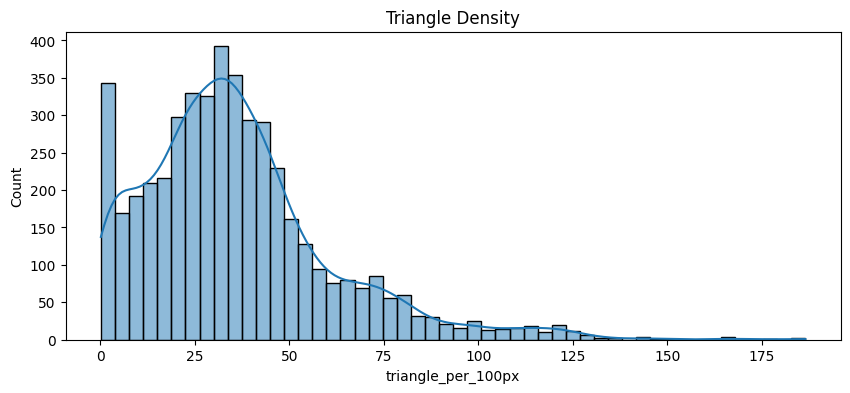

In [59]:
plt.figure(figsize=(10, 4)) 

plt.title('Triangle Density')
sns.histplot(df['triangle_per_100px'], kde=True, bins=50)

plt.show()

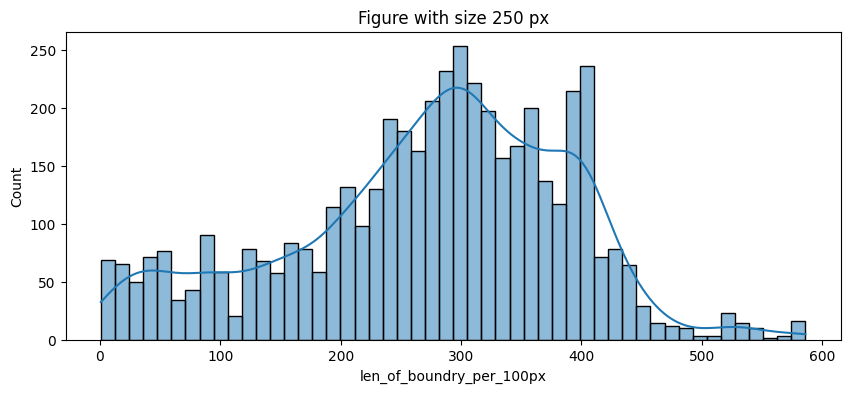

In [13]:
plt.figure(figsize=(10, 4)) 

plt.title('Figure with size 250 px')
sns.histplot(df['len_of_boundry_per_100px'], kde=True, bins=50)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

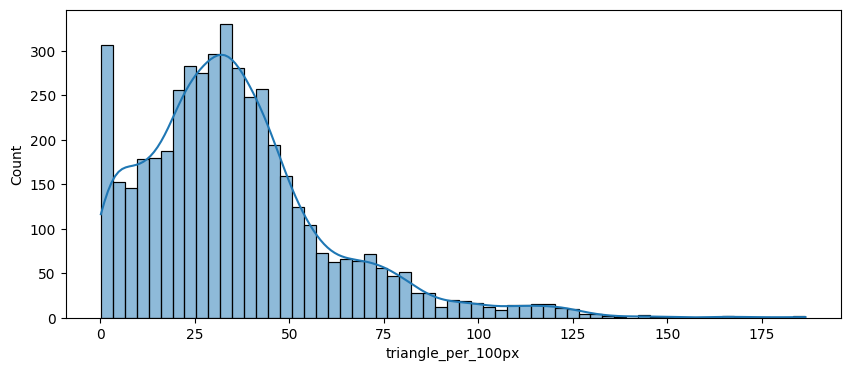

In [27]:
plt.figure(figsize=(10, 4)) 
sns.histplot(df['triangle_per_100px'], kde=True)
plt.show


In [42]:
def categorize_image(value):
    if 0 <= value <= 125:
        return 0
    elif 125 < value <= 250:
        return 1
    else:
        return 2

<function matplotlib.pyplot.show(close=None, block=None)>

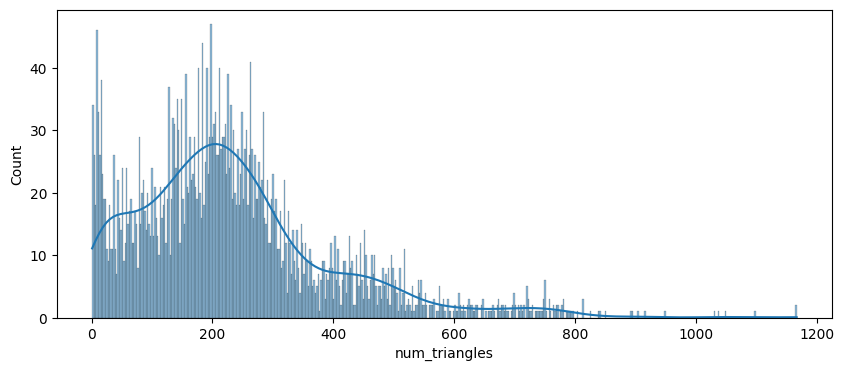

In [69]:
plt.figure(figsize=(10, 4))
df_250 = df[(df['tile_size']==250)&(df['len_of_boundry_inv']!=0)]
sns.histplot(df_250['num_triangles'], kde=True, bins=500)
plt.show

In [48]:
df_250['image_category'] = df_250['num_triangles'].apply(categorize_image)

In [56]:
df_250[df_250['num_triangles']>900]

,name,len_of_boundry,len_of_boundry_inv,disjoint_image,tile_size,num_triangles,image_category,triangle_per_100px,density_category,neighbours,len_of_boundry_per_100px
4557,planar_device_10_250_3_2.png,1275.539105,336.710677,1,250,1048,2,167.68,2,3,134.684271
4704,planar_device_120_250_2_3.png,983.698485,98.284271,1,250,1166,2,186.56,2,5,39.313708
4728,planar_device_125_250_2_3.png,963.195959,233.781743,1,250,1098,2,175.68,2,5,93.512697
4914,planar_device_155_250_3_4.png,1201.032575,1028.482317,1,250,915,2,146.40,2,5,411.392927
4940,planar_device_160_250_3_4.png,1132.593975,1011.629505,1,250,1030,2,164.80,2,6,404.651802
4969,planar_device_165_250_3_4.png,1066.918831,1001.747255,1,250,1165,2,186.40,2,6,400.698902
5003,planar_device_170_250_3_4.png,992.829473,997.865005,1,250,948,2,151.68,2,6,399.146002
5100,planar_device_25_250_3_3.png,1203.032575,1030.482317,1,250,903,2,144.48,2,5,412.192927
5416,planar_device_80_250_2_3.png,1278.852814,342.024385,1,250,1036,2,165.76,2,3,136.809754


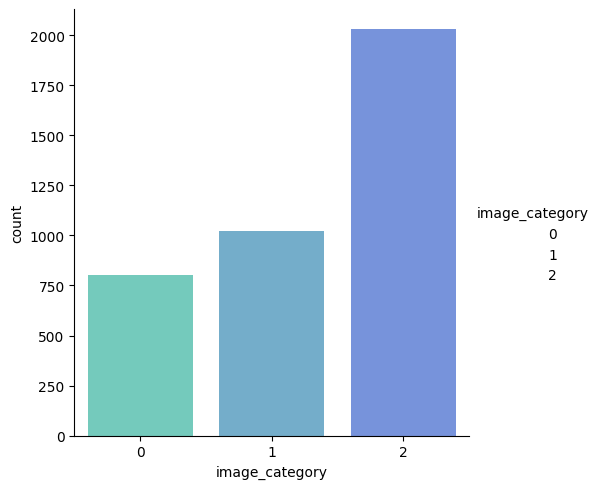

In [70]:
sns.catplot(data=df_250, x="image_category", kind='count', palette='winter_r', alpha=0.6)

<function matplotlib.pyplot.show(close=None, block=None)>

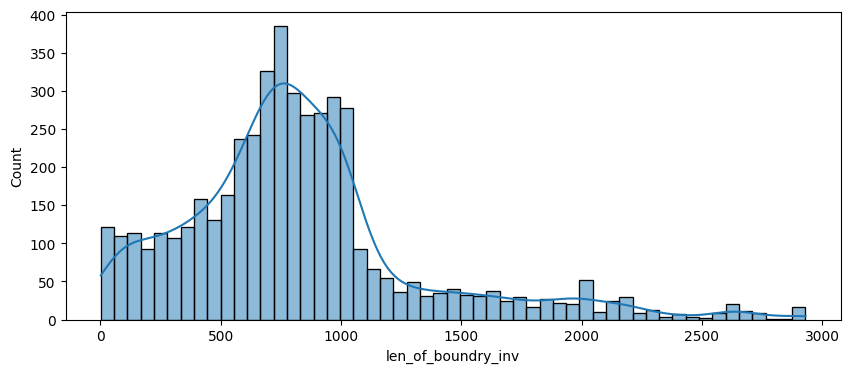

In [31]:
plt.figure(figsize=(10, 4)) 
sns.histplot(df['len_of_boundry_inv'], kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

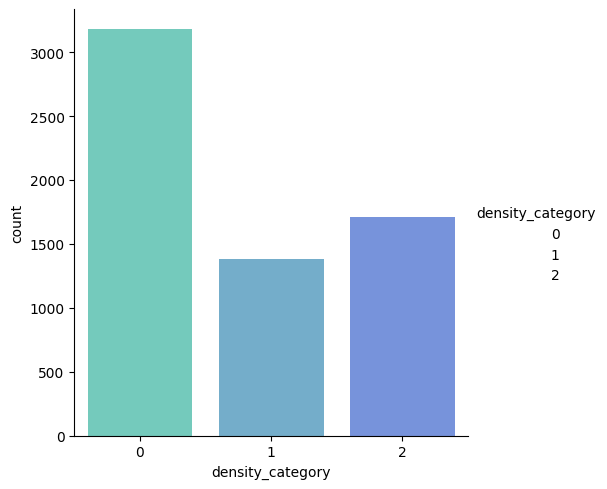

In [75]:
sns.catplot(data=df, x="density_category", kind='count', palette='winter_r', alpha=0.6)
#sns.catplot(data=df, hue="class", kind='bar', legend=False)
#sns.catplot(data=df, hue="density_category", kind='bar', palette='winter_r', alpha=0.6, legend=False)
plt.show

<Axes: xlabel='triangle_per_100px', ylabel='Count'>

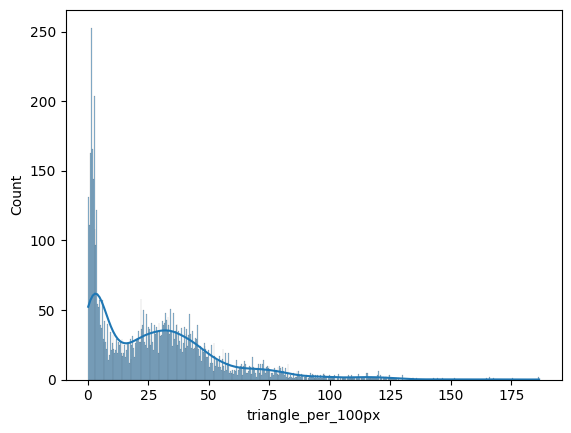

In [74]:
sns.histplot(df['triangle_per_100px'], kde=True, bins=500)

In [63]:
df_all = df

In [73]:
df['density_category'] = df['triangle_per_100px'].apply(categorize)

<function matplotlib.pyplot.show(close=None, block=None)>

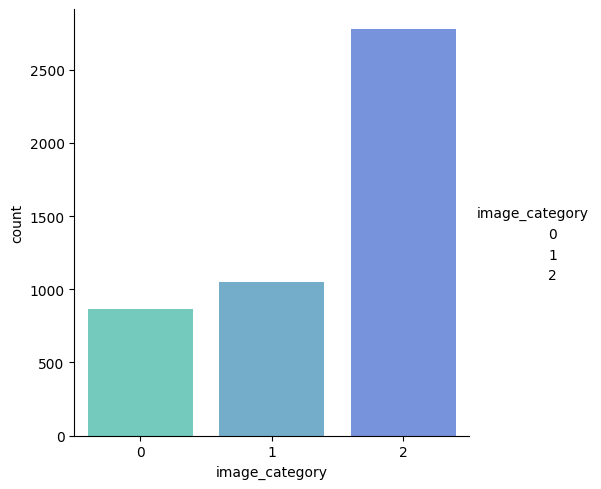

In [33]:
sns.catplot(data=df, x="image_category", kind='count', palette='winter_r', alpha=0.6)
#sns.catplot(data=df, hue="class", kind='bar', legend=False)
plt.show

In [34]:
df.describe()

,len_of_boundry,len_of_boundry_inv,disjoint_image,tile_size,num_triangles,image_category,triangle_per_100px,density_category,neighbours,len_of_boundry_per_100px
count,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000
mean,1277.253251,825.586717,1.172171,294.587684,328.612615,1.407202,36.030113,0.871298,4.525890,272.619496
std,715.522636,506.245343,0.508010,95.712128,323.589105,0.781396,25.134147,0.751280,1.834947,116.057281
min,0.000000,2.000000,0.000000,250.000000,1.000000,0.000000,0.120000,0.000000,0.000000,0.800000
25%,921.102597,530.592927,1.000000,250.000000,137.000000,1.000000,19.520000,0.000000,3.000000,205.813620
50%,1001.906638,764.925965,1.000000,250.000000,233.000000,2.000000,32.480000,1.000000,4.000000,288.250374
75%,1320.735065,995.497474,1.000000,250.000000,411.000000,2.000000,46.400000,1.000000,6.000000,356.457689
max,4356.896716,2930.739238,5.000000,500.000000,2699.000000,2.000000,186.560000,2.000000,8.000000,586.147848


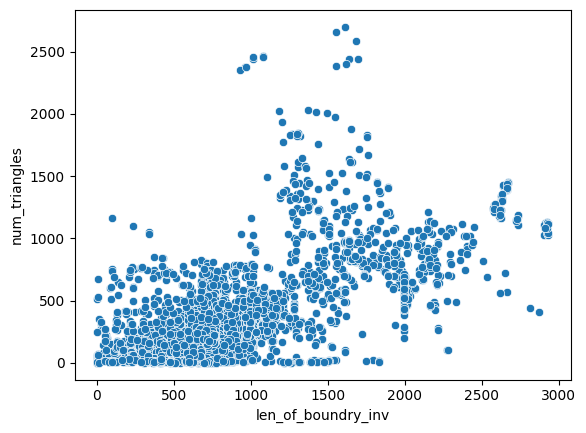

In [35]:
sns.scatterplot(data=df, x = 'len_of_boundry_inv', y='num_triangles')
plt.show()

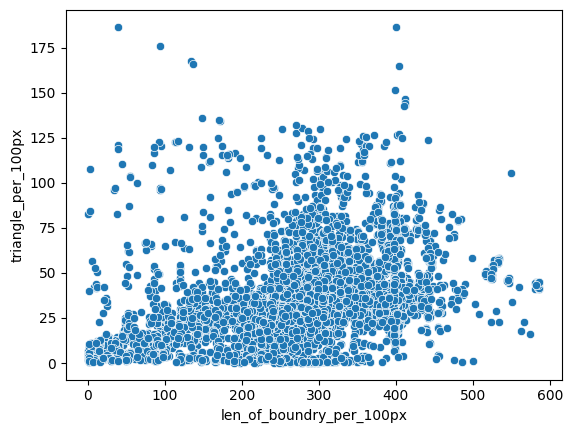

In [36]:
sns.scatterplot(data=df, x = 'len_of_boundry_per_100px', y='triangle_per_100px')
plt.show()

In [37]:
df_250 = df[df['tile_size']==250]
df_500 = df[df['tile_size']==500]

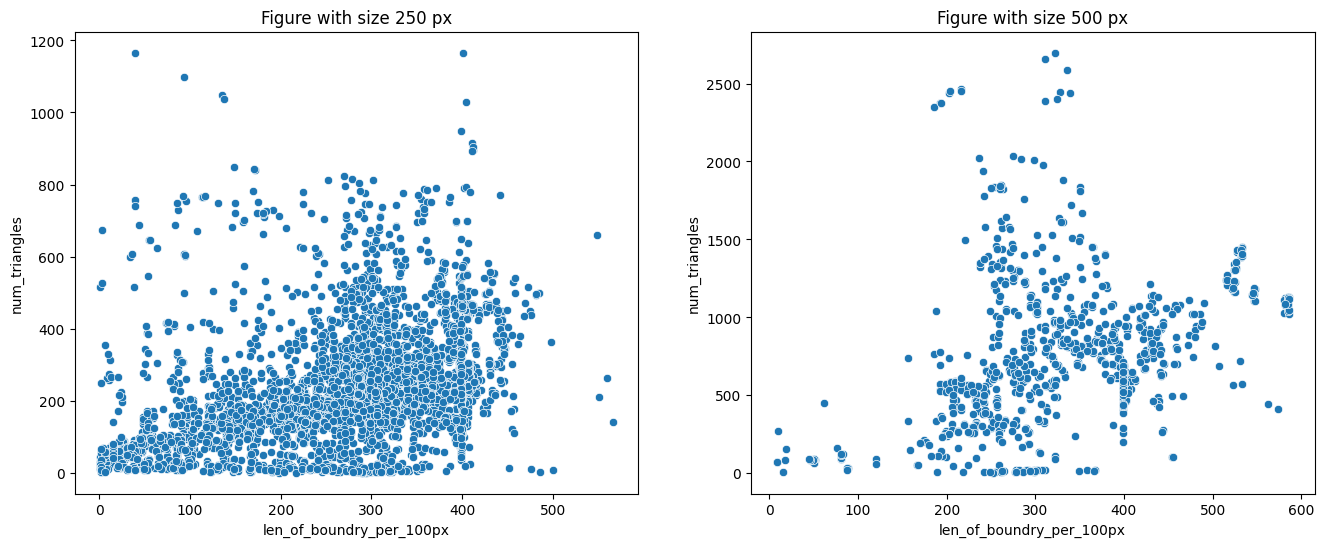

In [38]:

plt.figure(figsize=(16, 6)) 

plt.subplot(1, 2, 1)
plt.title('Figure with size 250 px')
sns.scatterplot(data=df_250, x = 'len_of_boundry_per_100px', y='num_triangles')

plt.subplot(1, 2, 2)
plt.title('Figure with size 500 px')
sns.scatterplot(data=df_500, x = 'len_of_boundry_per_100px', y='num_triangles')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

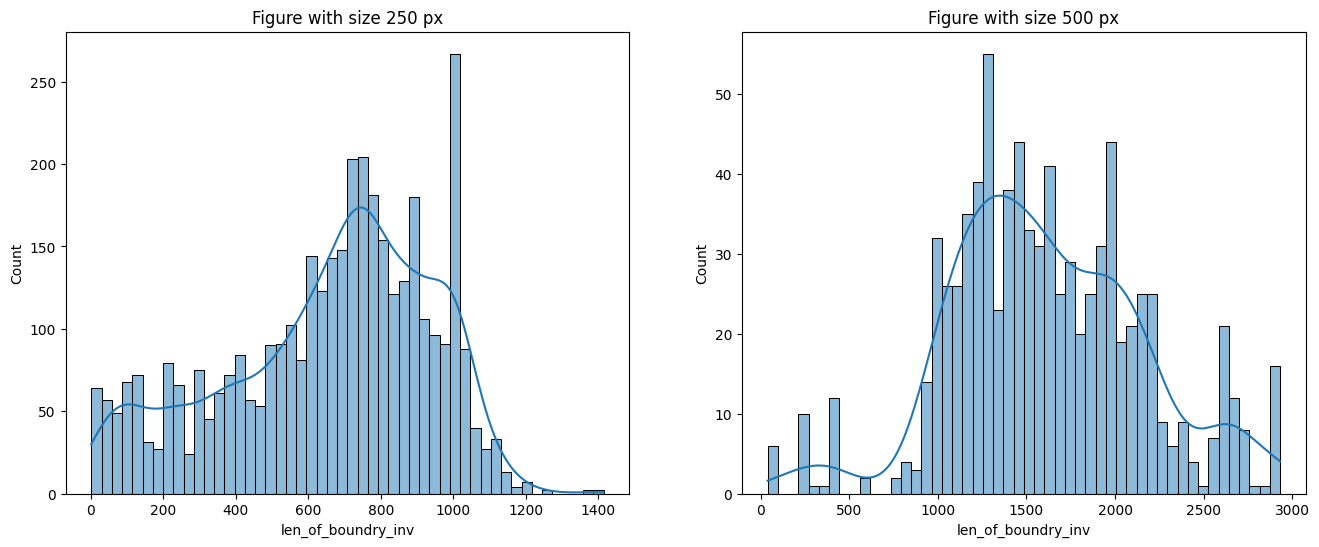

In [39]:
plt.figure(figsize=(16, 6)) 

plt.subplot(1, 2, 1)
plt.title('Figure with size 250 px')
sns.histplot(df_250['len_of_boundry_inv'], kde=True, bins=50)

plt.subplot(1, 2, 2)
plt.title('Figure with size 500 px')
sns.histplot(df_500['len_of_boundry_inv'], kde=True, bins=50)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

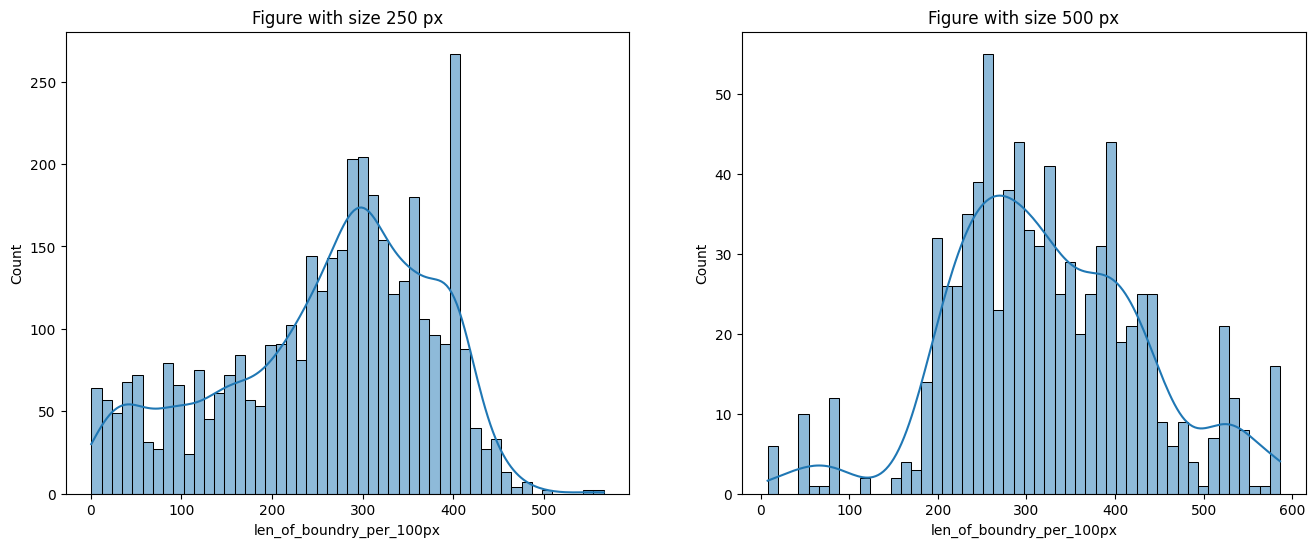

In [40]:
plt.figure(figsize=(16, 6)) 

plt.subplot(1, 2, 1)
plt.title('Figure with size 250 px')
sns.histplot(df_250['len_of_boundry_per_100px'], kde=True, bins=50)

plt.subplot(1, 2, 2)
plt.title('Figure with size 500 px')
sns.histplot(df_500['len_of_boundry_per_100px'], kde=True, bins=50)

plt.show

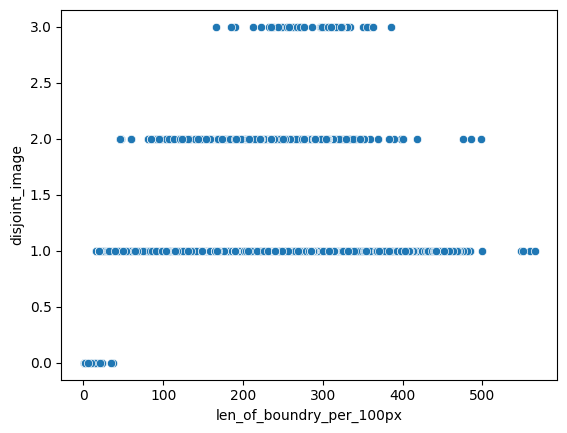

In [41]:
sns.scatterplot(data=df_250, x = 'len_of_boundry_per_100px', y='disjoint_image')
plt.show()

In [42]:
df_250[['len_of_boundry_per_100px','disjoint_image','num_triangles','triangle_per_100px','neighbours']].corr()

,len_of_boundry_per_100px,disjoint_image,num_triangles,triangle_per_100px,neighbours
len_of_boundry_per_100px,1.000000,0.125577,0.386206,0.386206,0.413449
disjoint_image,0.125577,1.000000,0.102240,0.102240,0.168446
num_triangles,0.386206,0.102240,1.000000,1.000000,0.226280
triangle_per_100px,0.386206,0.102240,1.000000,1.000000,0.226280
neighbours,0.413449,0.168446,0.226280,0.226280,1.000000


In [140]:
df.dtypes

name                         object
len_of_boundry              float64
len_of_boundry_inv          float64
disjoint_image                int64
tile_size                     int64
num_triangles                 int64
image_category                int64
triangle_per_100px          float64
density_category              int64
neighbours                    int64
len_of_boundry_per_100px    float64
dtype: object